In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

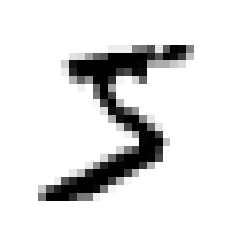

(None, '5')

In [4]:
X, y = mnist['data'], mnist['target']

import matplotlib as mpl
import matplotlib.pyplot as plt
idx = 0
some_digit = X[idx]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show() , y[idx]

In [5]:
import numpy as np
set_idx = 60000
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:set_idx], X[set_idx:], y[:set_idx], y[set_idx:]


In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [50]:
sgd_clf.predict([some_digit])

array([ True])

In [51]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

In [59]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [1]:
cm[1][1]/(cm[1][0]+cm[1][1]) #recall = TP/(TP+FN)

NameError: name 'cm' is not defined

In [2]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)

NameError: name 'y_train_5' is not defined

In [64]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict 

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [12]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [13]:
some_digit_score = svm_clf.decision_function([some_digit])
some_digit_score

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [14]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [16]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [20]:
knn_clf.predict([X[0]])

array([[False,  True]])

In [21]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [22]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [25]:
def load_data(file_path):
    return pd.read_csv(file_path)
dataset_path = './datasets/exam_sample/'
X_train = load_data(dataset_path+'x_train.csv')
X_test = load_data(dataset_path+'x_test.csv')
y_train = load_data(dataset_path+'y_train.csv')


In [128]:
X_train = X_train.fillna(0)
x_train = X_train.iloc[:,1:]

In [121]:
x_train

array([[68282840, 11264000, 6860000.0, ..., 3.894736842, 0.527027027, 17],
       [2136000, 2136000, 300000.0, ..., 1.5, 0.0, 1],
       [3197000, 1639000, 0.0, ..., 2.0, 0.0, 1],
       ...,
       [75000, 75000, 0.0, ..., 1.0, 0.0, 0],
       [1875000, 1000000, 0.0, ..., 1.0, 0.0, 39],
       [263101550, 34632000, 5973000.0, ..., 2.421052632, 0.4673913043,
        8]], dtype=object)

In [61]:
metric_attribs

Index(['총구매액', '최대구매액', '환불금액', '내점일수', '내점당구매건수', '주말방문비율', '구매주기'], dtype='object')

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
SimpleImputer(strategy='zero')

SimpleImputer(strategy='zero')

In [166]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# 수치형 자료 컬럼들
metric_attribs = X_train.columns[[1,2,3]]
# metric_attribs = X_train.columns[[3]]
metric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('std_scaler', StandardScaler())
])

# 범주형 자료 컬럼들
cat_attribs = ['주구매상품','주구매지점']
# cat_attribs = ['주구매상품']

full_pipeline = ColumnTransformer([
    ('num', metric_pipeline, metric_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])



In [167]:
metric_attribs

Index(['총구매액', '최대구매액', '환불금액'], dtype='object')

In [168]:
X_train

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39


In [173]:

svm_clf = Pipeline([
        
        ("bag_clt", BaggingClassifier(
        DecisionTreeClassifier(), n_estimators=1000,
        max_samples=100, bootstrap=True, n_jobs=-1
    )),
])


In [174]:
x_train_2 = full_pipeline.fit_transform(X_train)

In [175]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier



svm_clf.fit(X_traix_train_2in)


ValueError: at least one array or dtype is required

In [156]:
predict = svm_clf.predict(X_train)

/home/kwon/anaconda3/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


NotFittedError: This BaggingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [91]:
from sklearn.metrics import accuracy_score

accuracy_score(predict,y_train)

0.6782857142857143